In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('../docs/stroke_data.csv', delimiter=',', encoding='utf-8')
df = dfInit.copy(deep=True)
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,Female,Medium,1,1,28.283629,128.639802,0,Former,1
9996,82.607321,Female,Medium,1,1,31.148301,105.025226,1,Current,1
9997,86.020702,Female,High,1,1,32.641037,147.174095,0,Never,1
9998,67.387542,Female,Medium,0,1,29.946547,112.480515,0,Former,0


In [3]:
genderDict = {'Male': 0, 'Female': 1}
sesDict = {'Medium': 0, 'Low': 1, 'High': 2}
smokingDict = {'Current': 0, 'Never': 1, 'Former' : 3}

df["Gender"] = df["Gender"].map(lambda x: genderDict[x])
df["Smoking_Status"] = df["Smoking_Status"].map(lambda x: smokingDict[x])
df["SES"] = df["SES"].map(lambda x: sesDict[x])
display(df)

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,0,0,1,0,25.842521,96.428681,1,0,1
1,86.393609,1,0,1,1,32.531061,133.350068,0,1,1
2,76.158579,1,0,1,0,40.681244,111.489589,0,1,0
3,72.477870,1,1,0,1,33.003193,125.692465,0,3,0
4,59.881635,0,1,0,0,26.062443,123.218486,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,80.647182,1,0,1,1,28.283629,128.639802,0,3,1
9996,82.607321,1,0,1,1,31.148301,105.025226,1,0,1
9997,86.020702,1,2,1,1,32.641037,147.174095,0,1,1
9998,67.387542,1,0,0,1,29.946547,112.480515,0,3,0


In [4]:
x = df.drop(["Stroke"], axis=1)
y = df["Stroke"]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(xTrain)
xTrainTransform = scaler.transform(xTrain)
xTestTransform = scaler.transform(xTest)

In [6]:
def calc_accuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainTransform, yTrain)
    return mlpcClf.score(xTestTransform, yTest)

layerSize=(50,), accuracy: 0.7743333333333333
layerSize=(100,), accuracy: 0.7946666666666666
layerSize=(150,), accuracy: 0.794
layerSize=(200,), accuracy: 0.7933333333333333
layerSize=(250,), accuracy: 0.7963333333333333
layerSize=(300,), accuracy: 0.7953333333333333
layerSize=(350,), accuracy: 0.7926666666666666
layerSize=(400,), accuracy: 0.7916666666666666
layerSize=(450,), accuracy: 0.7946666666666666
layerSize=(500,), accuracy: 0.7926666666666666
layerSize=(750,), accuracy: 0.7966666666666666
layerSize=(1000,), accuracy: 0.7943333333333333


Text(0, 0.5, 'accuracy')

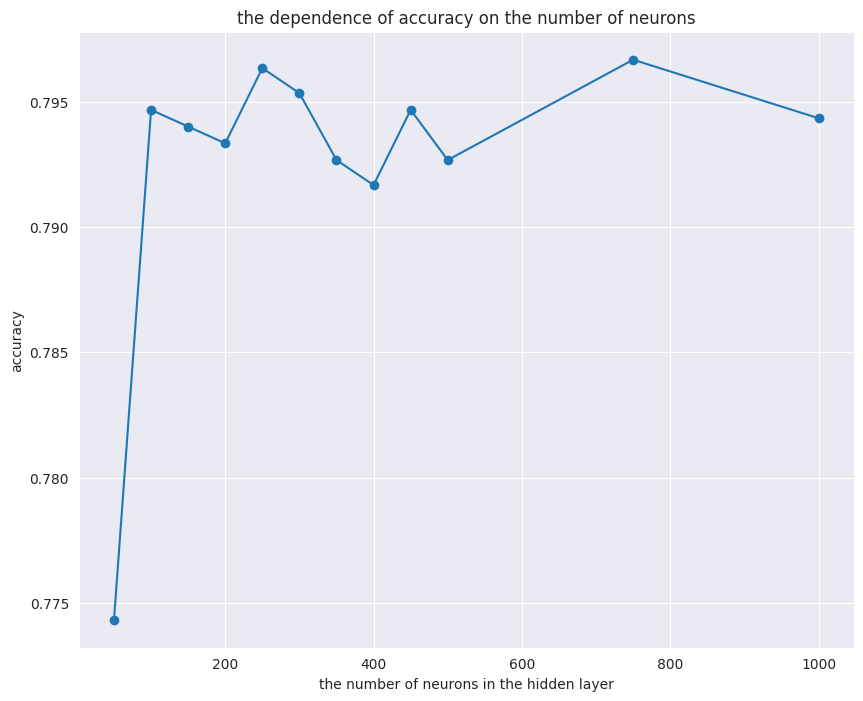

In [7]:
hiddenLayerSize = [(50,), (100,), (150,), (200,), (250,), (300,), (350,), (400,), (450,), (500,), (750,), (1000,)]

accuracies = []
for LayerSize in hiddenLayerSize:
    mlpcClf = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=LayerSize,
        max_iter=1000,
        early_stopping=True,
        random_state=42
    )
    accuracies.append(calc_accuracy(mlpcClf))
    print(f'layerSize={LayerSize}, accuracy: {calc_accuracy(mlpcClf)}')

layerSizes = [size[0] for size in hiddenLayerSize]

plt.figure(figsize=(10, 8))
plt.plot(layerSizes, accuracies, marker='o')
plt.title('the dependence of accuracy on the number of neurons')
plt.xlabel('the number of neurons in the hidden layer')
plt.ylabel('accuracy')

In [8]:
solvers = ['sgd', 'adam', 'lbfgs']
for solver in solvers:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(250,),
        max_iter=1000,
        early_stopping=True,
        random_state=42
    )
    print(f'solver={solver}, accuracy: {calc_accuracy(mlpcClf)}')

solver=sgd, accuracy: 0.7903333333333333
solver=adam, accuracy: 0.7963333333333333
solver=lbfgs, accuracy: 0.72


/home/artemborisov/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [9]:
activationFunctions = [
    'identity',
    'logistic',
    'tanh',
    'relu',
]
for func in activationFunctions:
    mlpcClf = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(250,),
        max_iter=1000,
        early_stopping=True,
        activation=func,
        random_state=42
    )
    print (f'func={func}, accuracy: {calc_accuracy(mlpcClf)}')

func=identity, accuracy: 0.789
func=logistic, accuracy: 0.7943333333333333
func=tanh, accuracy: 0.7973333333333333
func=relu, accuracy: 0.7963333333333333


iter=100, accuracy: 0.7973333333333333
iter=150, accuracy: 0.7973333333333333
iter=200, accuracy: 0.7973333333333333
iter=250, accuracy: 0.7973333333333333
iter=300, accuracy: 0.7973333333333333
iter=350, accuracy: 0.7973333333333333
iter=400, accuracy: 0.7973333333333333
iter=450, accuracy: 0.7973333333333333
iter=500, accuracy: 0.7973333333333333
iter=550, accuracy: 0.7973333333333333
iter=600, accuracy: 0.7973333333333333
iter=650, accuracy: 0.7973333333333333
iter=700, accuracy: 0.7973333333333333
iter=800, accuracy: 0.7973333333333333
iter=850, accuracy: 0.7973333333333333
iter=900, accuracy: 0.7973333333333333
iter=950, accuracy: 0.7973333333333333
iter=1000, accuracy: 0.7973333333333333


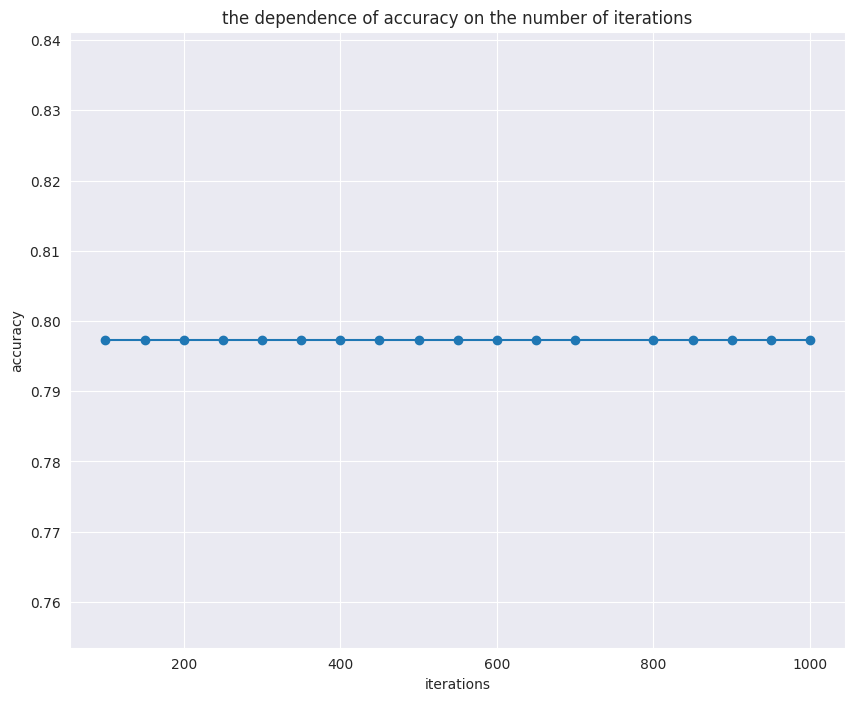

In [10]:
iterationsArr = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 850, 900, 950, 1000]

accuracies = []
for iter in iterationsArr:
    mlpcClf = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=(250,),
        max_iter=iter,
        early_stopping=True,
        activation='tanh',
        random_state=42
    )
    accuracies.append(calc_accuracy(mlpcClf))
    print(f'iter={iter}, accuracy: {calc_accuracy(mlpcClf)}')

plt.figure(figsize=(10, 8))
plt.plot(iterationsArr, accuracies, marker='o')
plt.title('the dependence of accuracy on the number of iterations')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()

In [11]:
mlpcClf = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(250,),
    max_iter=100,
    early_stopping=True,
    activation='tanh',
    random_state=42
)
print(f'accuracy: {calc_accuracy(mlpcClf)}')

accuracy: 0.7973333333333333


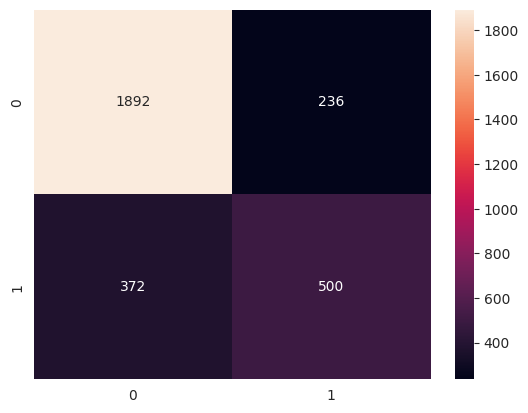

In [12]:
classes_name = ['0', '1']

cm = pd.DataFrame(
    confusion_matrix(yTest, mlpcClf.predict(xTestTransform)),
    columns=classes_name,
    index=classes_name,
)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()